# (1b) it works for the data provided in the attached CSV file. For create a
# CSV file with three features and two classes manually. Read this CSV file
# and executive the Perceptron code.

In [3]:
import pandas as pd
df = pd.DataFrame({"weight":[250,240,265,290,225,120,110,105,88,95],
                  "redness":[225,250,235,245,240,66,80,75,86,90],
                  "price":[88,102,105,145,150,25,20,18,22,12],
                  "class":[1,1,1,1,1,-1,-1,-1,-1,-1]})

import os  
os.makedirs("C:/Users/user/FML + IMAGE_PROCESSING+AI_B/FML_Assignments/",exist_ok=True)  
df.to_csv('C:/Users/user/FML + IMAGE_PROCESSING+AI_B/FML_Assignments/app_or.csv')  




In [9]:
import pandas as pd
import numpy as np

class Perceptron:
    def __init__(self, num_features, learning_rate=0.1, epochs=300):
        self.weights = np.random.rand(num_features + 1)  # +1 for the bias term
        self.learning_rate = learning_rate
        self.epochs = epochs

    def activate(self, x):
        if(x>=0):
            return 1
        else:
            return -1

    def predict(self, inputs):
        summation = np.dot(inputs, self.weights[1:]) + self.weights[0]
        return self.activate(summation)

    def train(self, training_data, labels):
        for _ in range(self.epochs):
            for inputs, label in zip(training_data, labels):
                prediction = self.predict(inputs)
                update = self.learning_rate * (label - prediction)
                self.weights[1:] += update * inputs
                self.weights[0] += update
#                 print('updated')







In [10]:
data = pd.read_csv("app_or.csv")
data.head()
data = data.iloc[:,1:]
X = data.drop(["class"],axis=1)
y = data["class"]
print(X,"\n\n",y)


   weight  redness  price
0     250      225     88
1     240      250    102
2     265      235    105
3     290      245    145
4     225      240    150
5     120       66     25
6     110       80     20
7     105       75     18
8      88       86     22
9      95       90     12 

 0    1
1    1
2    1
3    1
4    1
5   -1
6   -1
7   -1
8   -1
9   -1
Name: class, dtype: int64


In [11]:
# Training data: [weight, redness]
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state=42)


In [12]:
#converting the data into array inputs.
training_data = X_train.to_numpy()
labels_data = y_train.to_numpy()

perceptron = Perceptron(num_features=3)
perceptron.train(training_data, labels_data)

# Test the trained perceptron
testing_data = X_test.to_numpy() # test_data is the array input of X_test which was converted earlier

for data in testing_data:
    prediction = perceptron.predict(data)
    if prediction == 1:
        print("Apple")
    else:
        print("Orange")



Apple
Apple


<IPython.core.display.Javascript object>


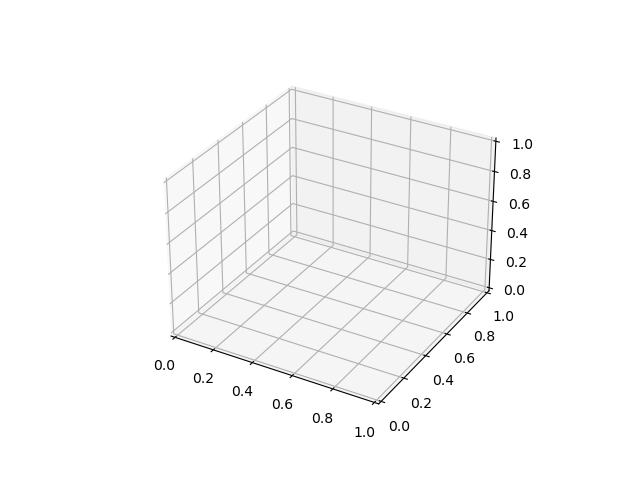

NameError: name 'labels' is not defined

In [13]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt


fig = plt.figure()
ax = plt.axes(projection="3d")


# Create and train the perceptron
perceptron = Perceptron(num_features=3)
perceptron.train(training_data, labels)

# points for 3D plot
x_vals = np.linspace(0,500, 1000)
y_vals = np.linspace(0,500, 1000)
x_vals, y_vals = np.meshgrid(x_vals, y_vals)
z_vals = -(perceptron.weights[1] * x_vals + perceptron.weights[2] * y_vals + perceptron.weights[0]) / perceptron.weights[3]

# Scatter plot of training data

ax.scatter(training_data[labels == 1][:, 0], training_data[labels == 1][:, 1], training_data[labels == 1][:, 2], color='red', label='Apple')
ax.scatter(training_data[labels == 0][:, 0], training_data[labels == 0][:, 1], training_data[labels == 0][:, 2], color='orange', label='Orange')

# Plot the decision boundary
ax.plot_surface(x_vals, y_vals, z_vals, alpha=1.0, cmap='gray')
ax.set_xlabel("Weight")
ax.set_ylabel("Redness")
ax.set_zlabel("Price")
plt.title('3D PLOT')
plt.show()

In [1]:
# pip install ipympl
